来源： [b站刘二大人--处理多维特征输入](https://www.bilibili.com/video/BV1Y7411d7Ys?p=7)
# Prepare Dataset

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])  # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
# print(x_data)
# print(y_data)

# Define Model

In [2]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()
# print(model)

# Construct Loss and Optimizer
## 注意在使用二元交叉熵计算损失的维度关系(计算之前还需要激活)，这里的y_pred和y_data维度都是(\[759, 1\])

In [3]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


# Training Cycle

100 0.6349487900733948
200 0.6077790260314941
300 0.5349051356315613
400 0.49239832162857056
500 0.47708648443222046
600 0.47083351016044617
700 0.4678039848804474
800 0.46609175205230713
900 0.46507570147514343
1000 0.4643370807170868
1100 0.4638917148113251
1200 0.4633699655532837
1300 0.4628671109676361
1400 0.46233758330345154
1500 0.4616852402687073
1600 0.46136367321014404
1700 0.46047282218933105
1800 0.45588210225105286
1900 0.4528065621852875
2000 0.4513491094112396


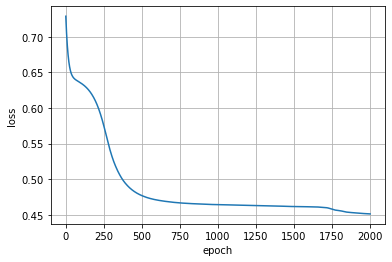

In [4]:
y_loss = [] 
max_epoch = 2001
for epoch in range(1, max_epoch):
    # forward
    y_pred = model(x_data)
    # 注意在使用二元交叉熵计算损失的维度关系(计算之前还需要激活)，这里的y_pred和y_data维度都是([759, 1])
    loss = criterion(y_pred, y_data)
    if epoch % 100 == 0:
        print(epoch, loss.item())
    y_loss.append(loss.item())
    # backward
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()


# 展示epoch-loss变化图像
x_epoch = np.arange(1, max_epoch)
plt.plot(x_epoch, y_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()



In [5]:
print(y_data.shape)
print(y_pred.shape)


torch.Size([759, 1])
torch.Size([759, 1])
